Содержание работы

1. (1 балл) Загрузите предложенный вам датасет с помощью функции `sklearn.datasets.fetch_openml`. Выведите текстовое описание загруженного датасета. Обозначьте целевую переменную за `y`, а остальные данные за `X`.
2. (1 балл) Выведите основную статистическую информацию о данных. Сделайте количественное описание датасета: число строк (объектов), число столбцов (признаков), статистику по признакам, количество классов (значений целевой переменной).
3. (1 балл) Убедитесь, что данные пригодны для моделирования. В данных не должно быть пропущенных значений, ве признаки должны быть численными. Если эти условия нарушаются, исправьте это.
4. (2 балла) Обучите модель логистической регрессии на рассматриваемых данных из библиотеки `sklearn`. Рассчитайте метрики accuracy и выведите таблицу классификации.
5. (2 балла) Обучите полиномиальную модель классификации. Рассчитайте метрики accuracy и выведите таблицу классификации. Попробуйте разные степени полинома и выберите ту, которая работает лучше.
6. (2 балла) Обучите модель классификации по методу опорных векторов. Рассчитайте метрики accuracy и выведите таблицу классификации. Попробуйте разные ядерные функции и выберите ту, которая работает лучше.
7. (1 балл) Обучите модель классификации Перцептрон. Рассчитайте метрики accuracy и выведите таблицу классификации.
8. (2 балла) Выведите итоговую таблицу сравнения всех моделей. В таблице должна быть информация о эффективности и времени обучения каждой модели. Сделайте вывод о применимости и эффективности моделей для классификации объектов в данной задаче.



Задача 1.

In [ ]:
# Импорт необходимых библиотек
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import time
import pandas as pd
import numpy as np

# Загрузка датасета
dataset = fetch_openml(name="olindda_outliers", as_frame = True, parser = "pandas")
dataset.DESCR

'Outliers data set extracted from the Illustration (Fig. 3) in &quot;Novelty detection with application to data\nstreams&quot;\n\nDownloaded from openml.org.'

In [ ]:
X, y = dataset.data, dataset.target
print(X)
print("------------------")
print(y)

          x_0        x_1
0   82.136441 -74.928833
1   61.100717 -67.410193
2   36.683335 -68.236317
3   66.985287 -77.428261
4   79.611189 -68.236317
..        ...        ...
70  35.848913 -59.891553
71  93.203077 -35.661977
72  44.390298 -33.097975
73  40.174572 -21.385194
74  80.445611 -72.408348

[75 rows x 2 columns]
------------------
0       normal
1       normal
2       normal
3       normal
4       normal
        ...   
70      normal
71    novelty2
72    novelty1
73    novelty1
74      normal
Name: label, Length: 75, dtype: category
Categories (4, object): ['normal', 'novelty1', 'novelty2', 'outlier']


Задача 2.

In [ ]:
# Основная статистическая информация о данных
data_info = pd.DataFrame({
    'Number of Instances': [X.shape[0]],
    'Number of Features': [X.shape[1]],
    'Number of Classes': len(set(y)),
    'Missing Values': X.isnull().sum().sum(),
})
print("\nData Information:")
data_info


Data Information:


,Number of Instances,Number of Features,Number of Classes,Missing Values
0,75,2,4,0


In [ ]:
# Выведим количество строк и столбцов
num_rows, num_col = X.shape
print(f"Число строк (объектов): {num_rows}")
print(f"Число столбцов (признаков): {num_col}")

# Выведим статистику по признакам
print("Статистика по признакам:")
print(X.describe())

# Количество классов (значений целевой переменной)
num_class = y.nunique()
print(f"Количество классов (значений целевой переменной):{num_class}")

Число строк (объектов): 75
Число столбцов (признаков): 2
Статистика по признакам:
              x_0        x_1
count   75.000000  75.000000
mean    65.620992 -49.747495
std     21.684487  22.435307
min     29.239499 -92.335341
25%     44.741727 -70.745923
50%     63.735546 -49.721525
75%     84.716481 -28.990868
max    104.972930 -15.474583
Количество классов (значений целевой переменной):4


In [ ]:
# Выведем тип данных каждого признака
print("Тип данных по признакам:")
print(X.dtypes)

Тип данных по признакам:
x_0    float64
x_1    float64
dtype: object


Задача 3.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
# Проверим, являются ли все признаки числовыми
non_numeric_columns = X.select_dtypes(exclude=['number']).columns
if not non_numeric_columns.empty:
    print("\nНечисловые колонки:")
    print(non_numeric_columns)
    # Если есть нечисловые колонки, изменим следующим образом:
    # Преобразование категориального признака с использованием LabelEncoder
    for i in non_numeric_columns:
      label_encoder = LabelEncoder()
      X[f'{i}'] = label_encoder.fit_transform(X[f'{i}'])
    print("\nДатасет после изменения нечисловых колонок:")
    print(X)
else:
    print("\nВсе признаки числовые.")


Все признаки числовые.


In [ ]:
# Проверка и обработка пропущенных значений
if X.isnull().any().any():
    X.fillna(X.mean(), inplace=True)

#Преобразование строковых данных в числовые в целевой переменной
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
type(y)

numpy.ndarray

In [ ]:
X_n = X.to_numpy()

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 1, 0, 0, 3, 3, 2, 3, 2, 1, 0, 1, 1,
       0, 2, 2, 2, 1, 2, 3, 0, 3, 0, 1, 3, 3, 1, 2, 2, 2, 0, 2, 0, 0, 2,
       1, 2, 3, 0, 3, 0, 0, 3, 0, 2, 0, 0, 3, 2, 0, 1, 0, 3, 0, 0, 3, 2,
       2, 3, 0, 1, 0, 2, 1, 1, 0])

Задача 4.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

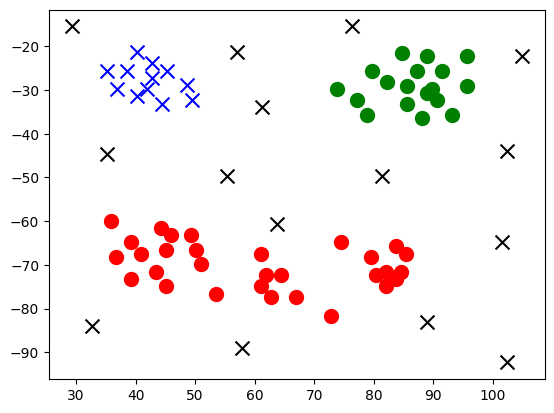

In [ ]:
plt.scatter(X_n[:, 0][y==0], X_n[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X_n[:, 0][y==1], X_n[:, 1][y==1], marker="x", c='b', s=100)
plt.scatter(X_n[:, 0][y==2], X_n[:, 1][y==2], marker="o", c='g', s=100)
plt.scatter(X_n[:, 0][y==3], X_n[:, 1][y==3], marker="x", c='black', s=100)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

X.head()

,x_0,x_1
0,82.136441,-74.928833
1,61.100717,-67.410193
2,36.683335,-68.236317
3,66.985287,-77.428261
4,79.611189,-68.236317


In [ ]:
from sklearn import metrics

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


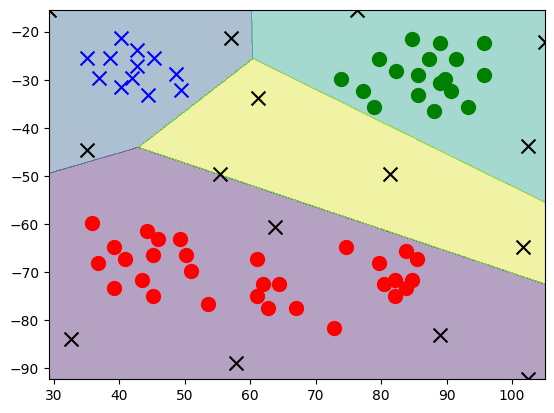

In [ ]:
#обучение логистической регресии
logistic = LogisticRegression().fit(X, y)
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.1),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.1))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)
plt.scatter(X.iloc[:, 0][y==2], X.iloc[:, 1][y==2], marker="o", c='g', s=100)
plt.scatter(X.iloc[:, 0][y==3], X.iloc[:, 1][y==3], marker="x", c='black', s=100)


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import time

In [ ]:
# Инициализация и обучение модели логистической регрессии другим методом
model = LogisticRegression(random_state=42)
start_time_logreg = time.time()

model.fit(X, y)

# Прогнозирование на всем датасете
y_pred = model.predict(X)
end_time_logreg = time.time()
rez1 =end_time_logreg - start_time_logreg
# Рассчет метрики accuracy
accuracy_logreg = accuracy_score(y, y_pred)
print("Accuracy:", accuracy_logreg)

# Вывод таблицы классификации
classification_rep = classification_report(y, y_pred)
print("Таблица классификации:\n", classification_rep)

# Вывод матрицы ошибок (confusion matrix)
conf_matrix = confusion_matrix(y, y_pred)
print("Матрица ошибок:\n", conf_matrix)

Accuracy: 0.8533333333333334
Таблица классификации:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        30
           1       0.80      1.00      0.89        12
           2       0.86      1.00      0.92        18
           3       1.00      0.27      0.42        15

    accuracy                           0.85        75
   macro avg       0.88      0.82      0.79        75
weighted avg       0.88      0.85      0.82        75

Матрица ошибок:
 [[30  0  0  0]
 [ 0 12  0  0]
 [ 0  0 18  0]
 [ 5  3  3  4]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Таблица классификации предоставляет детальную информацию о производительности модели для каждого класса в задаче многоклассовой классификации. Вот как можно интерпретировать основные метрики, представленные в таблице классификации:

Precision (точность): Доля правильно предсказанных положительных классов относительно всех предсказанных положительных классов. Формула: precision = TP / (TP + FP)

Recall (полнота): Доля правильно предсказанных положительных классов относительно всех истинных положительных классов. Формула: recall = TP / (TP + FN)

F1-score (F-мера): Среднее гармоническое между точностью и полнотой. F1-score стремится к 1, когда и точность, и полнота высоки. Формула: F1 = 2 * (precision * recall) / (precision + recall)

Support: Количество истинных меток для каждого класса в тестовом наборе данных.

Интерпретация:

Модель показывает хорошие результаты для классов 0, 1 и 2 с высокой точностью и F1-score.
Однако для класса 3 recall намного ниже, что может быть вызвано дисбалансом классов или несбалансированным представлением этого класса в данных.

Задача 5.

In [ ]:
# Создаем пустую таблицу для записи результатов
results_table = pd.DataFrame(columns=['Degree', 'Accuracy', 'Execution Time'])

# Определяем диапазон степеней полинома, которые мы хотим проверить
degree_range = [1,2,3,5,10]

for degree in degree_range:
    # Начинаем отсчет времени
    start_time = time.time()

    # Обучение модели с использованием полиномиальных признаков
    poly_model = make_pipeline(PolynomialFeatures(degree), LogisticRegression(max_iter= 10000, random_state=42))
    poly_model.fit(X, y)

    # Прогнозирование
    y_pred_poly = poly_model.predict(X)

    # Завершаем отсчет времени
    end_time = time.time()


    # Рассчет метрики accuracy
    accuracy_poly = accuracy_score(y, y_pred_poly)

    # Запись результатов в таблицу
    results_table = results_table.append({
        'Degree': degree,
        'Accuracy': accuracy_poly,
        'Execution Time': end_time - start_time
    }, ignore_index=True)

# Выводим результаты
print(results_table)

<ipython-input-88-2d1a32ad4542>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-88-2d1a32ad4542>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({
<ipython-input-88-2d1a32ad4542>:26: FutureWarning: The frame.append m

   Degree  Accuracy  Execution Time
0     1.0  0.853333        0.191122
1     2.0  0.880000        4.967099
2     3.0  0.906667        1.147737
3     5.0  0.933333        1.919313
4    10.0  0.400000        0.011263


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-88-2d1a32ad4542>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stabl

In [ ]:
degree = 3  # Меняем степень полинома на наилучшую, по таблице это 3 степень
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Обучение модели с использованием полиномиальных признаков
poly_model = make_pipeline(PolynomialFeatures(degree), LogisticRegression(random_state=42))
start_time_poly = time.time()
poly_model.fit(X, y)

# Прогнозирование
y_pred_poly = poly_model.predict(X)
end_time_poly = time.time()
rez2 = end_time_poly - start_time_poly
# Рассчет метрики accuracy
accuracy_poly = accuracy_score(y, y_pred_poly)
print(f"Accuracy для полиномиальной модели (степень {degree}): {accuracy_poly}")

# Вывод таблицы классификации
classification_rep_poly = classification_report(y, y_pred_poly)
print("Таблица классификации для полиномиальной модели:\n", classification_rep_poly)

# Вывод матрицы ошибок (confusion matrix)
conf_matrix_poly = confusion_matrix(y, y_pred_poly)
print("Матрица ошибок для полиномиальной модели:\n", conf_matrix_poly)

Accuracy для полиномиальной модели (степень 3): 0.8266666666666667
Таблица классификации для полиномиальной модели:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84        30
           1       1.00      0.75      0.86        12
           2       0.94      0.94      0.94        18
           3       0.73      0.53      0.62        15

    accuracy                           0.83        75
   macro avg       0.86      0.79      0.81        75
weighted avg       0.83      0.83      0.82        75

Матрица ошибок для полиномиальной модели:
 [[28  0  0  2]
 [ 3  9  0  0]
 [ 0  0 17  1]
 [ 6  0  1  8]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Для класса 0 модель имеет хорошую точность (0.76) и высокий recall (0.93), что означает, что она хорошо находит и правильно классифицирует большинство элементов этого класса.
Класс 1 имеет идеальную точность (1.00), но немного ниже recall (0.75), что может указывать на то, что модель несколько пропускает некоторые элементы этого класса.
Класс 2 показывает высокие значения precision, recall и F1-score, что свидетельствует о хорошем качестве модели для этого класса.
Класс 3 имеет более низкие значения precision, recall и F1-score, что может указывать на трудности модели в правильном классифицировании элементов этого класса.
Взвешенное среднее F1-score составляет 0.82, что может быть интерпретировано как хороший уровень общей производительности модели.

Задача 6.

In [ ]:
svm_results_table = pd.DataFrame(columns=['Kernel', 'Accuracy'])

# Определяем ядра, которые мы хотим проверить
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    # Обучение модели SVM с различными ядрами
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X, y)

    # Прогнозирование
    y_pred_svm = svm_model.predict(X)

    # Рассчет метрики accuracy
    accuracy_svm = accuracy_score(y, y_pred_svm)

    # Запись результатов в таблицу
    svm_results_table = svm_results_table.append({
        'Kernel': kernel,
        'Accuracy': accuracy_svm
    }, ignore_index=True)

# Выводим результаты
print(svm_results_table)

   Kernel  Accuracy
0  linear  0.826667
1    poly  0.813333
2     rbf  0.800000


<ipython-input-82-1140fc9283f2>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  svm_results_table = svm_results_table.append({
<ipython-input-82-1140fc9283f2>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  svm_results_table = svm_results_table.append({
<ipython-input-82-1140fc9283f2>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  svm_results_table = svm_results_table.append({


In [ ]:
# Выбираем лучшее ядро
best_kernel = "linear"

# Обучение модели SVM с лучшим ядром
best_svm_model = SVC(kernel=best_kernel, random_state=42)
start_time_svm = time.time()
best_svm_model.fit(X, y)

# Прогнозирование
y_pred_best_svm = best_svm_model.predict(X)
end_time_svm = time.time()
rez3 = end_time_svm - start_time_svm
# Рассчет метрики accuracy
accuracy_best_svm = accuracy_score(y, y_pred_best_svm)

# Вывод таблицы классификации
classification_rep_best_svm = classification_report(y, y_pred_best_svm)
print(f"Таблица классификации для SVM с ядром '{best_kernel}':\n", classification_rep_best_svm)

# Вывод матрицы ошибок (confusion matrix)
conf_matrix_best_svm = confusion_matrix(y, y_pred_best_svm)
print(f"Матрица ошибок для SVM с ядром '{best_kernel}':\n", conf_matrix_best_svm)

Таблица классификации для SVM с ядром 'linear':
               precision    recall  f1-score   support

           0       0.81      1.00      0.90        30
           1       0.80      1.00      0.89        12
           2       0.86      1.00      0.92        18
           3       1.00      0.13      0.24        15

    accuracy                           0.83        75
   macro avg       0.87      0.78      0.74        75
weighted avg       0.86      0.83      0.77        75

Матрица ошибок для SVM с ядром 'linear':
 [[30  0  0  0]
 [ 0 12  0  0]
 [ 0  0 18  0]
 [ 7  3  3  2]]


Самая лучшая из ядер это 'linear'. Данный о ней я и вывела. Анализ модели схож с предыдущими.

Задача 7.

In [ ]:
# Обучение модели перцептрона
perceptron_model = Perceptron(random_state=42)
start_time_perceptron = time.time()
perceptron_model.fit(X, y)

# Прогнозирование
y_pred_perceptron = perceptron_model.predict(X)
end_time_perceptron = time.time()
rez4 = end_time_perceptron - start_time_perceptron
# Рассчет метрики accuracy
accuracy_perceptron = accuracy_score(y, y_pred_perceptron)
print("Accuracy для модели перцептрона:", accuracy_perceptron)

# Вывод таблицы классификации
classification_rep_perceptron = classification_report(y, y_pred_perceptron)
print("Таблица классификации для модели перцептрона:\n", classification_rep_perceptron)

# Вывод матрицы ошибок (confusion matrix)
conf_matrix_perceptron = confusion_matrix(y, y_pred_perceptron)
print("Матрица ошибок для модели перцептрона:\n", conf_matrix_perceptron)

Accuracy для модели перцептрона: 0.6266666666666667
Таблица классификации для модели перцептрона:
               precision    recall  f1-score   support

           0       0.56      1.00      0.71        30
           1       0.00      0.00      0.00        12
           2       0.81      0.94      0.87        18
           3       0.00      0.00      0.00        15

    accuracy                           0.63        75
   macro avg       0.34      0.49      0.40        75
weighted avg       0.42      0.63      0.49        75

Матрица ошибок для модели перцептрона:
 [[30  0  0  0]
 [12  0  0  0]
 [ 1  0 17  0]
 [11  0  4  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Анализ модели схож с предыдущими, 3 класс показывает нули, что говорит о его хаотичности и невожможности обьективной оценки.

Задача 8.

In [ ]:
#Итоговая таблица сравнения всех моделей
results_df = pd.DataFrame({
    'Модель': ['Логистическая регрессия', 'Полиномиальная (степень 3)', 'Модель SVR', 'Модель Перцептрона'],
    'Score': [accuracy_logreg, accuracy_poly, accuracy_svm, accuracy_perceptron],
    'Время обучения (сек)': [rez1, rez2, rez3, rez4]
})

print(results_df)

                       Модель     Score  Время обучения (сек)
0     Логистическая регрессия  0.853333              0.027535
1  Полиномиальная (степень 3)  0.826667              0.051841
2                  Модель SVR  0.800000              0.013797
3          Модель Перцептрона  0.626667              0.015712


Вывод: Логистическая регрессия демонстрирует хорошие результаты как в точности, так и во времени обучения, что делает ее привлекательным выбором.
Полиномиальная модель имеет более сложную структуру, и время обучения немного выше.
Модель SVM имеет небольшое снижение точности, но при этом время обучения остается низким.
Модель Перцептрона показывает наименьшую точность, что может быть связано с ограниченной способностью модели обработки сложных паттернов в данных.
Выбор зависит от разных задач, если мы ориентируемся на точность, то это Логистическая модель